### Failure Mode 2 — Overlap Imbalance Sensitivity

This experiment tests the second failure mode described in the paper: CMGPs exhibit degraded performance when the treatment and control groups have poor overlap in covariate space. This is common when the treatment ratio is far from 0.5.

To evaluate this, the treatment ratio is varied from 0.1 to 0.5, simulating increasing imbalance. The baseline CMGP model is compared against an enhanced version using hybrid overlap-aware kernel scaling. Results are averaged over 100 random seeds for robustness and plotted with 95% confidence intervals.

The results correspond to Figure 5 in Section 4.1.2 and clearly show that overlap-aware scaling significantly improves stability and accuracy under extreme treatment imbalances.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from src.evaluate import evaluate_dataset
from src.cmgp.utils.metrics import mean_confidence_interval

def run_treatment_ratio_experiment(
    treatment_ratios=np.linspace(0.1, 0.5, 9),
    seeds=range(100),
    n_samples=1000,
    polynomial_degree=2,
    max_iterations=100
):
    """
    Evaluate CMGP performance across varying treatment ratios to study Failure Mode 2:
    performance degradation under poor treatment/control overlap.

    Compares:
    - Baseline CMGP (standard kernel)
    - Enhanced CMGP with hybrid overlap-aware kernel scaling

    Args:
        treatment_ratios (array-like): Proportions of treated individuals to simulate imbalance.
        seeds (iterable): List of random seeds for averaging results.
        d (int): Total dimensionality of covariates (unused here, fixed as n_confounders + n_modifiers).
        n_samples (int): Total number of synthetic samples.
        polynomial_degree (int): Degree of polynomial in outcome model.
        max_iterations (int): Max iterations for CMGP training.
    """
    baseline_means, baseline_cis = [], []
    enhanced_means, enhanced_cis = [], []

    for ratio in treatment_ratios:
        baseline_pehes = []
        enhanced_pehes = []

        for seed in seeds:
            # Baseline CMGP (no overlap scaling)
            result_base = evaluate_dataset(
                "synthetic",
                data_path=Path("src/data"),
                n_confounders=5,
                n_effect_modifiers=10,
                n_instruments=0,
                n_samples=n_samples,
                seed=seed,
                polynomial_degree=polynomial_degree,
                treatment_ratio=ratio,
                overlap_scaling=False,
                max_gp_iterations=max_iterations
            )
            baseline_pehes.append(result_base["√PEHE"])

            # Overlap-Aware Enhanced CMGP
            result_enh = evaluate_dataset(
                "synthetic",
                data_path=Path("src/data"),
                n_confounders=5,
                n_effect_modifiers=10,
                n_instruments=0,
                n_samples=n_samples,
                seed=seed,
                polynomial_degree=polynomial_degree,
                treatment_ratio=ratio,
                overlap_scaling=True,
                max_gp_iterations=max_iterations
            )
            enhanced_pehes.append(result_enh["√PEHE"])

        # Aggregate mean and CI for plotting
        base_mean, base_ci = mean_confidence_interval(baseline_pehes)
        enh_mean, enh_ci = mean_confidence_interval(enhanced_pehes)

        baseline_means.append(base_mean)
        baseline_cis.append(base_ci)
        enhanced_means.append(enh_mean)
        enhanced_cis.append(enh_ci)

    # Plotting performance vs treatment ratio
    plt.figure(figsize=(8, 5))
    plt.errorbar(treatment_ratios, baseline_means, yerr=baseline_cis, fmt='--o',
                 label="Baseline CMGP", color='gray')
    plt.errorbar(treatment_ratios, enhanced_means, yerr=enhanced_cis, fmt='-o',
                 label="Overlap-Aware CMGP", color='dodgerblue')
    plt.axvline(0.5, linestyle=':', color='black', alpha=0.5, label='Balanced Treatment (0.5)')

    plt.xlabel("Treatment Ratio (Treated Proportion)")
    plt.ylabel("√PEHE")
    plt.title("CMGP Performance vs Treatment Ratio (Overlap Imbalance)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


[Hybrid Scaling] scalar ctrl=1.327, scalar treat=0.673
First 10 per-feature ctrl ratios (debug): [1.22 1.32 0.72 1.31 1.18 1.38 1.48 0.97 1.16 1.55]
First 10 per-feature treat ratios (debug): [0.78 0.68 1.28 0.69 0.82 0.62 0.52 1.03 0.84 0.45]
[Hybrid Scaling] scalar ctrl=1.327, scalar treat=0.673
First 10 per-feature ctrl ratios (debug): [1.22 1.32 0.72 1.31 1.18 1.38 1.48 0.97 1.16 1.55]
First 10 per-feature treat ratios (debug): [0.78 0.68 1.28 0.69 0.82 0.62 0.52 1.03 0.84 0.45]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Hybrid Scaling] scalar ctrl=1.338, scalar treat=0.662
First 10 per-feature ctrl ratios (debug): [1.62 0.87 1.16 1.65 1.34 1.72 1.23 1.5  1.75 1.02]
First 10 per-feature treat ratios (debug): [0.38 1.13 0.84 0.35 0.66 0.28 0.77 0.5  0.25 0.98]
[Hybrid Scaling] scalar ctrl=1.338, scalar treat=0.662
First 10 per-feature ctrl ratios (debug): [1.62 0.87 1.16 1.65 1.34 1.72 1.23 1.5  1.75 1.02]
First 10 per-feature treat ratios (debug): [0.38 1

 C:\Users\logan\Documents\Repos\CausalML-sandbox-main - Copy\venv\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in divide


[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.63 1.31 1.08 1.56 0.82 1.02 1.41 1.48 1.45 1.28]
First 10 per-feature treat ratios (debug): [0.37 0.69 0.92 0.44 1.18 0.98 0.59 0.52 0.55 0.72]
[Hybrid Scaling] scalar ctrl=1.296, scalar treat=0.704
First 10 per-feature ctrl ratios (debug): [1.63 1.31 1.08 1.56 0.82 1.02 1.41 1.48 1.45 1.28]
First 10 per-feature treat ratios (debug): [0.37 0.69 0.92 0.44 1.18 0.98 0.59 0.52 0.55 0.72]
[Covariate Scaling] Applied per-dim scaling to ICM0 and ICM1 kernels
[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctrl ratios (debug): [1.45 0.98 1.13 1.41 1.74 1.65 1.06 1.17 1.55 1.28]
First 10 per-feature treat ratios (debug): [0.55 1.02 0.87 0.59 0.26 0.35 0.94 0.83 0.45 0.72]
[Hybrid Scaling] scalar ctrl=1.268, scalar treat=0.732
First 10 per-feature ctrl ratios (debug): [1.45 0.98 1.13 1.41 1.74 1.65 1.06 1.17 1.55 1.28]
First 10 per-feature treat ratios (debug): [0.55 1

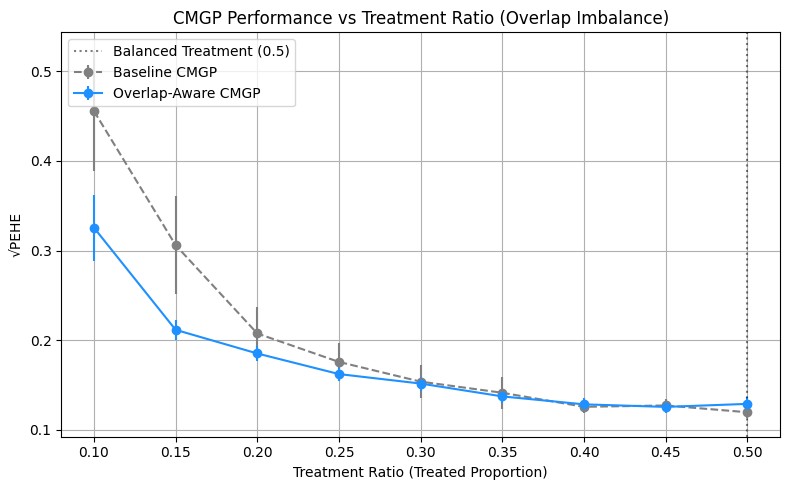

In [2]:
run_treatment_ratio_experiment()